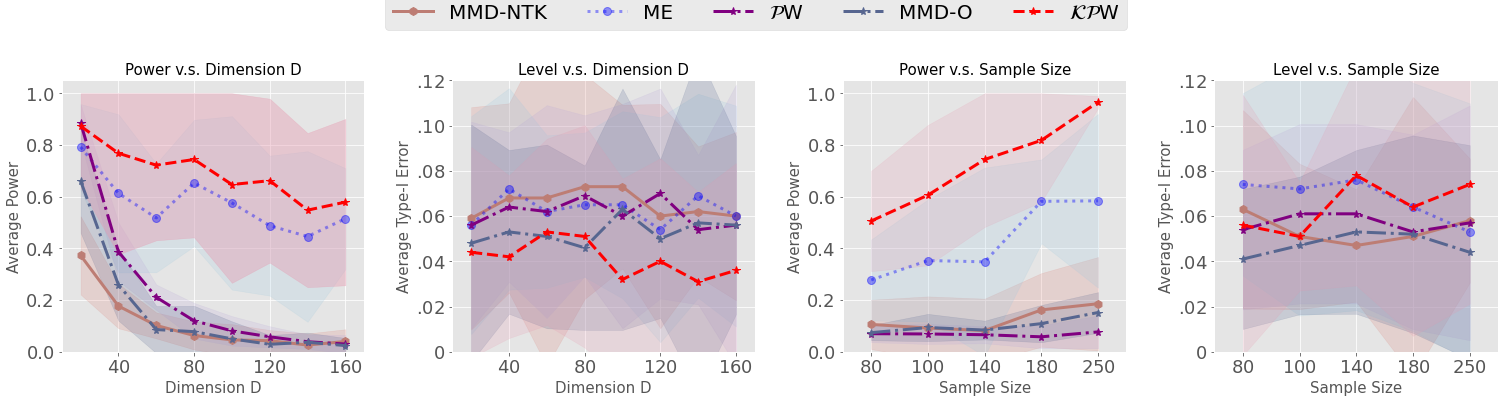

In [8]:
from logging import Handler
import numpy as np
import matplotlib.pyplot as plt

def get_summary_hist(decision_hist,LD_hist):
    summary_hist = np.zeros([LD_hist, 2])
    power_total_hist = np.mean(decision_hist,1)

    summary_hist[:,0] = np.mean(power_total_hist, 1)
    summary_hist[:,1] = 1.96 * np.sqrt(np.var(power_total_hist, 1))

    #print(power_total_hist)
    return summary_hist


plt.style.use("ggplot")
fig, axes = plt.subplots(ncols=4, figsize=(21,5.8), gridspec_kw={'width_ratios': [1.6, 1.6, 1.5, 1.5]})
x = np.array([1,2,3,4,5,6,7,8])

D_hist = [20,40,60,80,100,120,140,160]
LD_hist = len(D_hist)

############## Power v.s. Dimension ##############
decision_hist_ME = np.load('ME_decision_hist_GaussMixture_Dimension.npy')
decision_hist_NTK = np.load('NTK_decision_hist_GaussMixture_Dimension.npy')
decision_hist_PW = np.load('PW_decision_hist_GaussMixture_Dimension.npy')
decision_hist_MMDO = np.load('MMDO_decision_hist_GaussMixture_Dimension.npy')
decision_hist_KPW = np.load('KPW_decision_hist_GaussMixture_Dimension.npy')

summary_ME_hist = get_summary_hist(decision_hist_ME,LD_hist)
summary_NTK_hist = get_summary_hist(decision_hist_NTK,LD_hist)
summary_PW_hist = get_summary_hist(decision_hist_PW,LD_hist)
summary_MMDO_hist = get_summary_hist(decision_hist_MMDO,LD_hist)
summary_KPW_hist = get_summary_hist(decision_hist_KPW,LD_hist)

axes[0].plot(x, summary_NTK_hist[:,0], label=r'MMD-NTK', 
            linestyle = '-', marker = 'h', color='#BD7D74',ms=8,linewidth=3)
axes[0].plot(x, summary_ME_hist[:,0], label=r'ME', 
            linestyle = ':', marker = 'o', color='b',ms=8,linewidth=3,alpha=0.4)
axes[0].plot(x, summary_PW_hist[:,0], label=r'$\mathcal{P}$W', 
            linestyle = '-.', marker = '*', color='purple',ms=8,linewidth=3)
axes[0].plot(x, summary_MMDO_hist[:,0], label=r'MMD-O', 
            linestyle = '-.', marker = '*', color='#576690',ms=8,linewidth=3)
axes[0].plot(x, summary_KPW_hist[:,0], label=r'$\mathcal{KP}$W', 
            linestyle = '--', marker = '*', color='r',ms=8,linewidth=3)
axes[0].fill_between(x, 
                np.minimum(summary_NTK_hist[:,0]+summary_NTK_hist[:,1],1), 
                summary_NTK_hist[:,0]-summary_NTK_hist[:,1],
                color='#DB7D74',alpha=0.2)
axes[0].fill_between(x, 
                np.minimum(summary_ME_hist[:,0]+summary_ME_hist[:,1],1), 
                summary_ME_hist[:,0]-summary_ME_hist[:,1],
                color='#9AC8E2',alpha=0.2)
axes[0].fill_between(x, 
                np.minimum(summary_PW_hist[:,0]+summary_PW_hist[:,1],1), 
                summary_PW_hist[:,0]-summary_PW_hist[:,1],
                color='#B8A6D9',alpha=0.2)
axes[0].fill_between(x, 
                np.minimum(summary_MMDO_hist[:,0]+summary_MMDO_hist[:,1],1), 
                summary_MMDO_hist[:,0]-summary_MMDO_hist[:,1],
                color='#576690',alpha=0.2)
axes[0].fill_between(x, 
                np.minimum(summary_KPW_hist[:,0]+summary_KPW_hist[:,1],1), 
                summary_KPW_hist[:,0]-summary_KPW_hist[:,1],
                color='#E799B0',alpha=0.4)
axes[0].set_xlim([0.5,8+0.5])
axes[0].set_ylim([0,1.05])
axes[0].set_xticks([2,4,6,8])
axes[0].set_xticklabels([r'$40$',r'$80$',r'$120$',r'$160$'])
axes[0].grid(True)
axes[0].tick_params(labelsize=18)
axes[0].set_xlabel('Dimension D', fontsize=15)
axes[0].set_ylabel(r'Average Power', fontsize=15)
axes[0].set_title(r'Power v.s. Dimension D',fontsize=15)

############## Level v.s. Dimension ##############
decision_hist_NTK = np.load('NTK_decision_hist_GaussMixture_Dimension_level.npy')
decision_hist_ME = np.load('ME_decision_hist_GaussMixture_Dimension_level.npy')
decision_hist_PW = np.load('PW_decision_hist_GaussMixture_Dimension_level.npy')
decision_hist_MMDO = np.load('MMDO_decision_hist_GaussMixture_Dimension_level.npy')
decision_hist_KPW = np.load('KPW_decision_hist_GaussMixture_Dimension_level.npy')

summary_ME_hist = get_summary_hist(decision_hist_ME,LD_hist)
summary_NTK_hist = get_summary_hist(decision_hist_NTK,LD_hist)
summary_PW_hist = get_summary_hist(decision_hist_PW,LD_hist)
summary_MMDO_hist = get_summary_hist(decision_hist_MMDO,LD_hist)
summary_KPW_hist = get_summary_hist(decision_hist_KPW,LD_hist)

axes[1].plot(x, summary_NTK_hist[:,0], #label=r'MMD-NTK', 
            linestyle = '-', marker = 'h', color='#BD7D74',ms=8,linewidth=3)
axes[1].plot(x, summary_ME_hist[:,0], #label=r'ME', 
            linestyle = ':', marker = 'o', color='b',ms=8,linewidth=3,alpha=0.4)
axes[1].plot(x, summary_PW_hist[:,0], #label=r'$\mathcal{P}$W', 
            linestyle = '-.', marker = '*', color='purple',ms=8,linewidth=3)
axes[1].plot(x, summary_MMDO_hist[:,0], #label=r'MMD-O', 
            linestyle = '-.', marker = '*', color='#576690',ms=8,linewidth=3)
axes[1].plot(x, summary_KPW_hist[:,0], #label=r'$\mathcal{KP}$W', 
            linestyle = '--', marker = '*', color='r',ms=8,linewidth=3)
axes[1].fill_between(x, 
                np.minimum(summary_NTK_hist[:,0]+summary_NTK_hist[:,1],1), 
                summary_NTK_hist[:,0]-summary_NTK_hist[:,1],
                color='#DB7D74',alpha=0.2)
axes[1].fill_between(x, 
                np.minimum(summary_ME_hist[:,0]+summary_ME_hist[:,1],1), 
                summary_ME_hist[:,0]-summary_ME_hist[:,1],
                color='#9AC8E2',alpha=0.2)
axes[1].fill_between(x, 
                np.minimum(summary_PW_hist[:,0]+summary_PW_hist[:,1],1), 
                summary_PW_hist[:,0]-summary_PW_hist[:,1],
                color='#B8A6D9',alpha=0.2)
axes[1].fill_between(x, 
                np.minimum(summary_MMDO_hist[:,0]+summary_MMDO_hist[:,1],1), 
                summary_MMDO_hist[:,0]-summary_MMDO_hist[:,1],
                color='#576690',alpha=0.2)
axes[1].fill_between(x, 
                np.minimum(summary_KPW_hist[:,0]+summary_KPW_hist[:,1],1), 
                summary_KPW_hist[:,0]-summary_KPW_hist[:,1],
                color='#E799B0',alpha=0.2)

axes[1].set_xlim([0.5,8+0.5])
axes[1].set_ylim([0,0.12])
axes[1].set_xticks([1,2,3,4,5,6,7,8])
axes[1].set_xticks([2,4,6,8])
axes[1].set_xticklabels([r'$40$',r'$80$',r'$120$',r'$160$'])
axes[1].set_yticklabels([r'$0$',r'$.02$',r'$.04$',r'$.06$',r'$.08$',r'$.10$',r'$.12$'])
axes[1].grid(True)
axes[1].tick_params(labelsize=18)
axes[1].set_xlabel('Dimension D', fontsize=15)
axes[1].set_ylabel(r'Average Type-I Error', fontsize=15)
axes[1].set_title(r'Level v.s. Dimension D',fontsize=15)


############## Power v.s. Sample ##############
x = np.array([1,2,3,4,5])
LN_hist = len(x)
decision_hist_NTK = np.load('NTK_decision_hist_GaussMixture_Sample.npy')
decision_hist_ME = np.load('ME_decision_hist_GaussMixture_Sample.npy')
decision_hist_PW = np.load('PW_decision_hist_GaussMixture_Sample.npy')
decision_hist_MMDO = np.load('MMDO_decision_hist_GaussMixture_Sample.npy')
decision_hist_KPW = np.load('KPW_decision_hist_GaussMixture_Sample.npy')

summary_ME_hist = get_summary_hist(decision_hist_ME,LN_hist)
summary_NTK_hist = get_summary_hist(decision_hist_NTK,LN_hist)
summary_PW_hist = get_summary_hist(decision_hist_PW,LN_hist)
summary_MMDO_hist = get_summary_hist(decision_hist_MMDO,LN_hist)
summary_KPW_hist = get_summary_hist(decision_hist_KPW,LN_hist)

axes[2].plot(x, summary_NTK_hist[:,0], #label=r'MMD-NTK', 
            linestyle = '-', marker = 'h', color='#BD7D74',ms=8,linewidth=3)
axes[2].plot(x, summary_ME_hist[:,0], #label=r'ME', 
            linestyle = ':', marker = 'o', color='b',ms=8,linewidth=3,alpha=0.4)
axes[2].plot(x, summary_PW_hist[:,0], #label=r'$\mathcal{P}$W', 
            linestyle = '-.', marker = '*', color='purple',ms=8,linewidth=3)
axes[2].plot(x, summary_MMDO_hist[:,0], #label=r'MMD-O', 
            linestyle = '-.', marker = '*', color='#576690',ms=8,linewidth=3)
axes[2].plot(x, summary_KPW_hist[:,0], #label=r'$\mathcal{KP}$W', 
            linestyle = '--', marker = '*', color='r',ms=8,linewidth=3)

axes[2].fill_between(x, 
                np.minimum(summary_NTK_hist[:,0]+summary_NTK_hist[:,1],1), 
                summary_NTK_hist[:,0]-summary_NTK_hist[:,1],
                color='#DB7D74',alpha=0.2)
axes[2].fill_between(x, 
                np.minimum(summary_ME_hist[:,0]+summary_ME_hist[:,1],1), 
                summary_ME_hist[:,0]-summary_ME_hist[:,1],
                color='#9AC8E2',alpha=0.2)
axes[2].fill_between(x, 
                np.minimum(summary_PW_hist[:,0]+summary_PW_hist[:,1],1), 
                summary_PW_hist[:,0]-summary_PW_hist[:,1],
                color='#B8A6D9',alpha=0.2)
axes[2].fill_between(x, 
                np.minimum(summary_MMDO_hist[:,0]+summary_MMDO_hist[:,1],1), 
                summary_MMDO_hist[:,0]-summary_MMDO_hist[:,1],
                color='#576690',alpha=0.2)
axes[2].fill_between(x, 
                np.minimum(summary_KPW_hist[:,0]+summary_KPW_hist[:,1],1), 
                summary_KPW_hist[:,0]-summary_KPW_hist[:,1],
                color='#E799B0',alpha=0.2)
axes[2].set_xlim([0.5,5+0.5])
axes[2].set_ylim([0,1.05])
axes[2].set_xticks([1,2,3,4,5])
axes[2].set_xticklabels([r'$80$',r'$100$',r'$140$',r'$180$',r'$250$'])
axes[2].grid(True)
axes[2].tick_params(labelsize=18)
axes[2].set_xlabel('Sample Size', fontsize=15)
axes[2].set_ylabel(r'Average Power', fontsize=15)
axes[2].set_title(r'Power v.s. Sample Size',fontsize=15)

############## Level v.s. Sample ##############

decision_hist_NTK = np.load('NTK_decision_hist_GaussMixture_Sample_level.npy')
decision_hist_ME = np.load('ME_decision_hist_GaussMixture_Sample_level.npy')
decision_hist_PW = np.load('PW_decision_hist_GaussMixture_Sample_level.npy')
decision_hist_MMDO = np.load('MMDO_decision_hist_GaussMixture_Sample_level.npy')
decision_hist_KPW = np.load('KPW_decision_hist_GaussMixture_Sample_level.npy')

summary_ME_hist = get_summary_hist(decision_hist_ME,LN_hist)
summary_NTK_hist = get_summary_hist(decision_hist_NTK,LN_hist)
summary_PW_hist = get_summary_hist(decision_hist_PW,LN_hist)
summary_MMDO_hist = get_summary_hist(decision_hist_MMDO,LN_hist)
summary_KPW_hist = get_summary_hist(decision_hist_KPW,LN_hist)

axes[3].plot(x, summary_NTK_hist[:,0], #label=r'MMD-NTK', 
            linestyle = '-', marker = 'h', color='#BD7D74',ms=8,linewidth=3)
axes[3].plot(x, summary_ME_hist[:,0], #label=r'ME', 
            linestyle = ':', marker = 'o', color='b',ms=8,linewidth=3,alpha=0.4)
axes[3].plot(x, summary_PW_hist[:,0], #label=r'$\mathcal{P}$W', 
            linestyle = '-.', marker = '*', color='purple',ms=8,linewidth=3)
axes[3].plot(x, summary_MMDO_hist[:,0], #label=r'MMD-O', 
            linestyle = '-.', marker = '*', color='#576690',ms=8,linewidth=3)
axes[3].plot(x, summary_KPW_hist[:,0], #label=r'$\mathcal{KP}$W', 
            linestyle = '--', marker = '*', color='r',ms=8,linewidth=3)

axes[3].fill_between(x, 
                np.minimum(summary_NTK_hist[:,0]+summary_NTK_hist[:,1],1), 
                summary_NTK_hist[:,0]-summary_NTK_hist[:,1],
                color='#DB7D74',alpha=0.2)
axes[3].fill_between(x, 
                np.minimum(summary_ME_hist[:,0]+summary_ME_hist[:,1],1), 
                summary_ME_hist[:,0]-summary_ME_hist[:,1],
                color='#9AC8E2',alpha=0.2)
axes[3].fill_between(x, 
                np.minimum(summary_PW_hist[:,0]+summary_PW_hist[:,1],1), 
                summary_PW_hist[:,0]-summary_PW_hist[:,1],
                color='#B8A6D9',alpha=0.2)
axes[3].fill_between(x, 
                np.minimum(summary_MMDO_hist[:,0]+summary_MMDO_hist[:,1],1), 
                summary_MMDO_hist[:,0]-summary_MMDO_hist[:,1],
                color='#576690',alpha=0.2)
axes[3].fill_between(x, 
                np.minimum(summary_KPW_hist[:,0]+summary_KPW_hist[:,1],1), 
                summary_KPW_hist[:,0]-summary_KPW_hist[:,1],
                color='#E799B0',alpha=0.2)
axes[3].set_xlim([0.5,5+0.5])
axes[3].set_ylim([0,0.12])
axes[3].set_xticks([1,2,3,4,5])
axes[3].set_xticklabels([r'$80$',r'$100$',r'$140$',r'$180$',r'$250$'])
axes[3].set_yticks([0,0.02,0.04,0.06,0.08,0.10,0.12])
axes[3].set_yticklabels([r'$0$',r'$.02$',r'$.04$',r'$.06$',r'$.08$',r'$.10$',r'$.12$'])
axes[3].grid(True)
axes[3].tick_params(labelsize=18)
axes[3].set_xlabel('Sample Size', fontsize=15)
axes[3].set_ylabel(r'Average Type-I Error', fontsize=15)
axes[3].set_title(r'Level v.s. Sample Size',fontsize=15)





plt.subplots_adjust(top=0.8, bottom=0.15,left=0.04, wspace=0.3, right=0.99)#, right=1)
fig.legend(loc="upper center",fontsize=20,ncol=5,bbox_to_anchor=(0.5,1))
plt.savefig('Exp_GaussianMixture_summary.pdf')
